In [23]:
import numpy as np
from scipy.linalg import null_space
import math
import pandas as pd
import matplotlib.pyplot as plt
from numpy import cumsum

In [3]:
def bm(So,mu,sigma,N):
    b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)
    b=np.insert(b,0,So,axis=None)
    S=np.cumsum(b)
    return S
        
def generate_gbm_prices(start_price,instance,N,days,mu,sigma):
    """
    start_price: is the initial price same as So as above instance: are number of simulations you want increments: are increments in a day, same as N above days: # of total no of trading days
    """
    ins=instance
    prices=pd.DataFrame()
    for i in range(1,ins+1):
 #here what to put BM or increments 
        So=start_price
        temp=bm(So,mu,sigma,N)
        prices=pd.concat([prices,pd.Series(temp)],axis=1)
        print("loop {} complete, time: {}".format(i,datetime.datetime.now().time()))
    prices.columns=np.arange(1,ins+1,1) 
    return prices 

 #the below function labels the data properly 
def give_labels(N,days,data):
    obs_nu = np.arange(0,N+1) 
    final_prices=pd.DataFrame() 
    for i in range(1,days+1):
        temp_ = data.loc[N*(i-1):N*i] 
        day_label=[]
        for j in range(N+1):
            day_label.append('day'+str(i))
        tuples=list(zip(day_label,obs_nu))
        index=pd.MultiIndex.from_tuples(tuples,names=['DAY','#INCREMENT'])
        temp_1=pd.DataFrame(temp_.values,index=index)
        final_prices=pd.concat([final_prices,temp_1])
    return final_prices

def ochl_data(instances,N,days,data): 
    data_fin=pd.DataFrame()
    zz=data
    for i in range(instances):
        for j in range(1,days+1): 
            temp=pd.DataFrame({'OPEN':zz.loc['day'+str(j)][i][0],
                                            "CLOSE":zz.loc['day'+str(j)][i][N],
                                         'HIGH':max(zz.loc['day'+str(j)][i]),
                                        'LOW': min(zz.loc['day'+str(j)][i])},
                                 index=pd.MultiIndex.from_tuples([('Simulation'+str(i+1),
                                     'day'+str(j))],names=['Simulation#','DAY']))
            data_fin=pd.concat([data_fin,temp]) 
    return data_fin

In [4]:
import datetime
start_price=0
ins=200
N=700000
days=1
mu=0
sigma=np.sqrt(0.2)
soln=generate_gbm_prices(start_price=start_price,instance=ins,N=N,days=days,mu=mu,sigma=sigma)
ac_w_lab= give_labels(N,days,soln)
final=ochl_data(ins,N,days,ac_w_lab)


loop 1 complete, time: 22:46:37.852348
loop 2 complete, time: 22:46:38.003944
loop 3 complete, time: 22:46:38.160529
loop 4 complete, time: 22:46:38.326086
loop 5 complete, time: 22:46:38.484663
loop 6 complete, time: 22:46:38.658270
loop 7 complete, time: 22:46:38.827694
loop 8 complete, time: 22:46:39.011204
loop 9 complete, time: 22:46:39.195854
loop 10 complete, time: 22:46:39.369102
loop 11 complete, time: 22:46:39.551947
loop 12 complete, time: 22:46:39.758396
loop 13 complete, time: 22:46:39.950566
loop 14 complete, time: 22:46:40.138065
loop 15 complete, time: 22:46:40.325566
loop 16 complete, time: 22:46:40.518053
loop 17 complete, time: 22:46:40.720855
loop 18 complete, time: 22:46:40.899950
loop 19 complete, time: 22:46:41.153648
loop 20 complete, time: 22:46:41.361456
loop 21 complete, time: 22:46:41.560923
loop 22 complete, time: 22:46:41.749632
loop 23 complete, time: 22:46:41.947118
loop 24 complete, time: 22:46:42.146630
loop 25 complete, time: 22:46:42.355620
loop 26 c

In [5]:
soln

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000180,-0.000581,-0.000723,0.000370,0.000126,-0.001126,0.000250,0.000626,0.000055,0.000458,...,0.000079,0.000646,5.880687e-07,0.000250,0.000813,0.000308,-0.000155,-0.000361,0.000805,-0.001250
2,-0.000086,0.000345,-0.000484,0.000499,0.001418,-0.001227,-0.000412,0.000317,0.000661,0.001233,...,-0.000343,0.000989,-2.814037e-04,0.000379,0.000808,0.000310,-0.000477,-0.000394,0.000967,-0.000399
3,0.000417,-0.000281,-0.000109,-0.000074,0.000857,-0.001799,0.000001,-0.000213,-0.000401,0.001450,...,-0.000380,0.001528,2.375339e-04,-0.000250,0.000363,0.000850,0.000032,-0.000468,0.000975,0.000475
4,-0.000580,-0.000318,0.000039,0.000019,0.001174,-0.001924,-0.000554,-0.000253,-0.000093,0.001077,...,-0.001086,0.001595,-1.856159e-04,-0.000727,0.000362,0.001419,0.000371,-0.001105,0.001494,0.001048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,0.269517,-0.171287,0.133777,-0.874783,-0.286081,0.041645,-0.246716,0.398163,-0.202640,0.048575,...,-0.123232,-0.572701,-2.855093e-01,-0.914039,0.673133,0.660269,0.588370,0.264464,-0.444869,0.122333
699997,0.269373,-0.172146,0.133816,-0.874336,-0.285529,0.042269,-0.246286,0.398361,-0.203314,0.048437,...,-0.123085,-0.572309,-2.860000e-01,-0.914342,0.672827,0.660014,0.588210,0.263701,-0.444891,0.122708
699998,0.268970,-0.172046,0.133828,-0.873908,-0.285636,0.042665,-0.246672,0.397998,-0.204108,0.048266,...,-0.122763,-0.572561,-2.852169e-01,-0.914847,0.673437,0.659997,0.588116,0.264101,-0.444925,0.121990
699999,0.268671,-0.171159,0.134072,-0.873757,-0.285892,0.042457,-0.247307,0.397982,-0.204638,0.048148,...,-0.123075,-0.572733,-2.847642e-01,-0.913303,0.674295,0.659852,0.587705,0.264222,-0.445987,0.121949


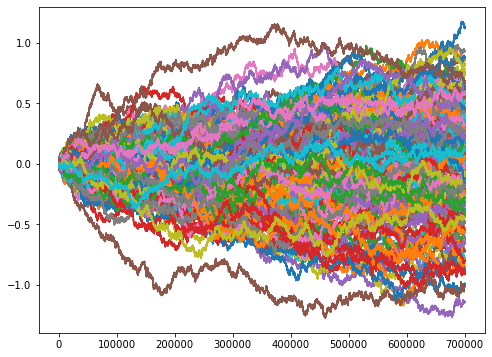

In [7]:
plt.figure(figsize=(8,6))
plt.plot(soln)
plt.show()

In [8]:
ac_w_lab= give_labels(N,days,soln)
ac_w_lab

0         1         2         3         4         5    \
DAY  #INCREMENT                                                               
day1 0           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
     1           0.000180 -0.000581 -0.000723  0.000370  0.000126 -0.001126   
     2          -0.000086  0.000345 -0.000484  0.000499  0.001418 -0.001227   
     3           0.000417 -0.000281 -0.000109 -0.000074  0.000857 -0.001799   
     4          -0.000580 -0.000318  0.000039  0.000019  0.001174 -0.001924   
...                   ...       ...       ...       ...       ...       ...   
     699996      0.269517 -0.171287  0.133777 -0.874783 -0.286081  0.041645   
     699997      0.269373 -0.172146  0.133816 -0.874336 -0.285529  0.042269   
     699998      0.268970 -0.172046  0.133828 -0.873908 -0.285636  0.042665   
     699999      0.268671 -0.171159  0.134072 -0.873757 -0.285892  0.042457   
     700000      0.268273 -0.170872  0.135300 -0.872893 -0.285834  0.043371   

                      6         7         8         9    ...       190  \
DAY  #INCREMENT                                          ...             
day1 0           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
     1           0.000250  0.000626  0.000055  0.000458  ...  0.000079   
     2          -0.000412  0.000317  0.000661  0.001233  ... -0.000343   
     3           0.000001 -0.000213 -0.000401  0.001450  ... -0.000380   
     4          -0.000554 -0.000253 -0.000093  0.001077  ... -0.001086   
...                   ...       ...       ...       ...  ...       ...   
     699996     -0.246716  0.398163 -0.202640  0.048575  ... -0.123232   
     699997     -0.246286  0.398361 -0.203314  0.048437  ... -0.123085   
     699998     -0.246672  0.397998 -0.204108  0.048266  ... -0.122763   
     699999     -0.247307  0.397982 -0.204638  0.048148  ... -0.123075   
     700000     -0.247075  0.398043 -0.205077  0.048184  ... -0.123297   

                      191           192       193       194       195  \
DAY  #INCREMENT                                                         
day1 0           0.000000  0.000000e+00  0.000000  0.000000  0.000000   
     1           0.000646  5.880687e-07  0.000250  0.000813  0.000308   
     2           0.000989 -2.814037e-04  0.000379  0.000808  0.000310   
     3           0.001528  2.375339e-04 -0.000250  0.000363  0.000850   
     4           0.001595 -1.856159e-04 -0.000727  0.000362  0.001419   
...                   ...           ...       ...       ...       ...   
     699996     -0.572701 -2.855093e-01 -0.914039  0.673133  0.660269   
     699997     -0.572309 -2.860000e-01 -0.914342  0.672827  0.660014   
     699998     -0.572561 -2.852169e-01 -0.914847  0.673437  0.659997   
     699999     -0.572733 -2.847642e-01 -0.913303  0.674295  0.659852   
     700000     -0.571659 -2.851500e-01 -0.912610  0.674014  0.659925   

                      196       197       198       199  
DAY  #INCREMENT                                          
day1 0           0.000000  0.000000  0.000000  0.000000  
     1          -0.000155 -0.000361  0.000805 -0.001250  
     2          -0.000477 -0.000394  0.000967 -0.000399  
     3           0.000032 -0.000468  0.000975  0.000475  
     4           0.000371 -0.001105  0.001494  0.001048  
...                   ...       ...       ...       ...  
     699996      0.588370  0.264464 -0.444869  0.122333  
     699997      0.588210  0.263701 -0.444891  0.122708  
     699998      0.588116  0.264101 -0.444925  0.121990  
     699999      0.587705  0.264222 -0.445987  0.121949  
     700000      0.588433  0.264501 -0.445786  0.121477  

[700001 rows x 200 columns]

In [9]:
final=ochl_data(ins,N,days,ac_w_lab)
final

,,OPEN,CLOSE,HIGH,LOW
Simulation#,DAY,,,,
Simulation1,day1,0.0,0.268273,0.723129,-0.153092
Simulation2,day1,0.0,-0.170872,0.119686,-0.448436
Simulation3,day1,0.0,0.135300,0.216572,-0.121210
Simulation4,day1,0.0,-0.872893,0.113400,-0.908515
Simulation5,day1,0.0,-0.285834,0.160849,-0.324643
...,...,...,...,...,...
Simulation196,day1,0.0,0.659925,1.157132,-0.050291
Simulation197,day1,0.0,0.588433,0.641695,-0.067292
Simulation198,day1,0.0,0.264501,0.408655,-0.355490


In [10]:
final['ln O']= (final["OPEN"])
final['ln C']= (final["CLOSE"])
final['ln H']= (final["HIGH"])
final['ln L']= (final["LOW"])
final['u^2']=((final["HIGH"])-(final["OPEN"]))**2
final['d^2']=((final["LOW"])-(final["OPEN"]))**2
final['c^2']=((final["CLOSE"])-(final["OPEN"]))**2
final['ud']= final["HIGH"]*final["LOW"]
final['uc']=  final["HIGH"]*final["CLOSE"]
final['dc']=  final["CLOSE"]*final["LOW"]

In [11]:
final.to_excel("test.xlsx")

In [14]:
def bm(So,mu,sigma,N):
    S=[]
    S.append(So)
    b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)
    b=cumsum(b)
    return S

In [24]:
mu=0
So=2
sigma=1
N=10
S=[]
S.append(So)
b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)
b=cumsum(b)

In [16]:
b

array([-0.21746941, -0.19438735, -0.56544619, -0.35242118, -0.21582401,
       -0.08395602, -0.37316536, -0.74380559, -0.45329664, -0.86770834])

In [17]:
c=b+S[0]
S.append(c)

In [18]:
c

array([1.78253059, 1.80561265, 1.43455381, 1.64757882, 1.78417599,
       1.91604398, 1.62683464, 1.25619441, 1.54670336, 1.13229166])

In [21]:
len(np.insert(c,0,2,axis=None))

11

In [25]:
bm(2,0,1,10)

[2]

In [26]:
N=10
mu=0
sigma=1
b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)

In [27]:
b

array([-0.37115209,  0.05996681,  0.33574704, -0.25117985, -0.24190984,
        0.44691914, -0.21758504,  0.06483474, -0.34755492,  0.31437112])

In [28]:
So=2
b=np.insert(b,0,So,axis=None)
   

In [29]:
b

array([ 2.        , -0.37115209,  0.05996681,  0.33574704, -0.25117985,
       -0.24190984,  0.44691914, -0.21758504,  0.06483474, -0.34755492,
        0.31437112])

In [30]:

S=np.cumsum(b)

In [31]:
S

array([2.        , 1.62884791, 1.68881472, 2.02456176, 1.77338192,
       1.53147207, 1.97839121, 1.76080617, 1.82564091, 1.47808599,
       1.79245711])